1. Importing libraries
2. Importing dataframe
3. Sales queries visualization
4. Marketing queries visualizations
5. Exporting Files

1. Importing libraries

In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

2. Importing dataframe

In [3]:
path = r'C:/Users/Alejandra/Documents/CF/Data Immersion/Achievement 4/06022025_Instacart Basket Analysis'

In [4]:
#Loading pickle files
df =pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'ord_prod_cust_final_version.pkl'))

3. Sales queries visualizations

SALES QUERY 1: Busiest days of the week and hours of the day (bdw, bhd)

In [6]:
#Busiest Days of the Week (bdw)

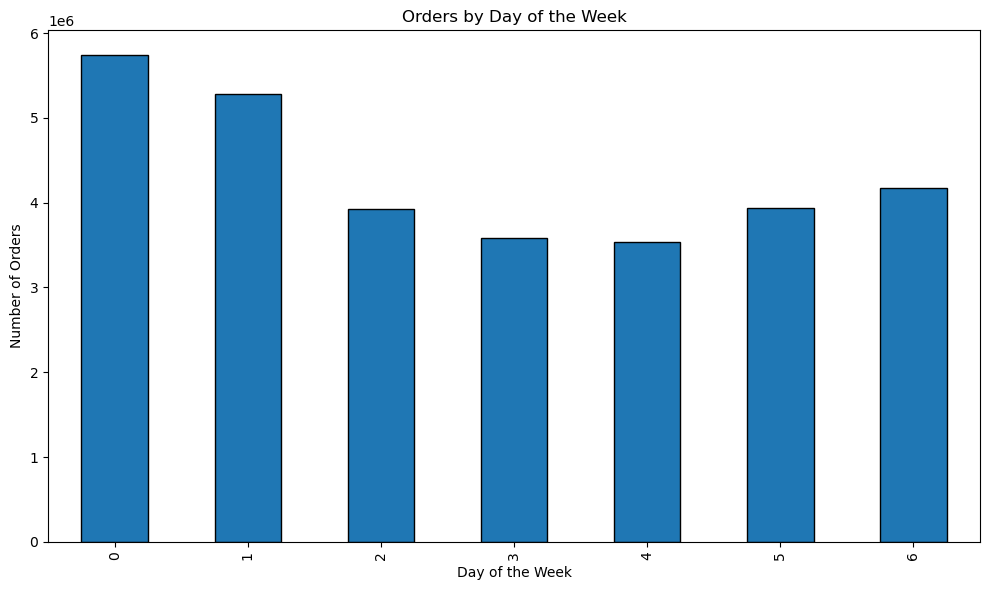

In [7]:
#Figure size
plt.figure(figsize=(10,6))

# Creating the bar chart from value counts
bdw = df['order_day_of_week'].value_counts().sort_index().plot.bar(
      edgecolor='black'
)

# Adding labels and title
bdw.set_xlabel('Day of the Week')
bdw.set_ylabel('Number of Orders')
bdw.set_title('Orders by Day of the Week')

# Adjusting layout
plt.tight_layout()
plt.show()

In [8]:
#Busiest Hour of the Day (bhd)

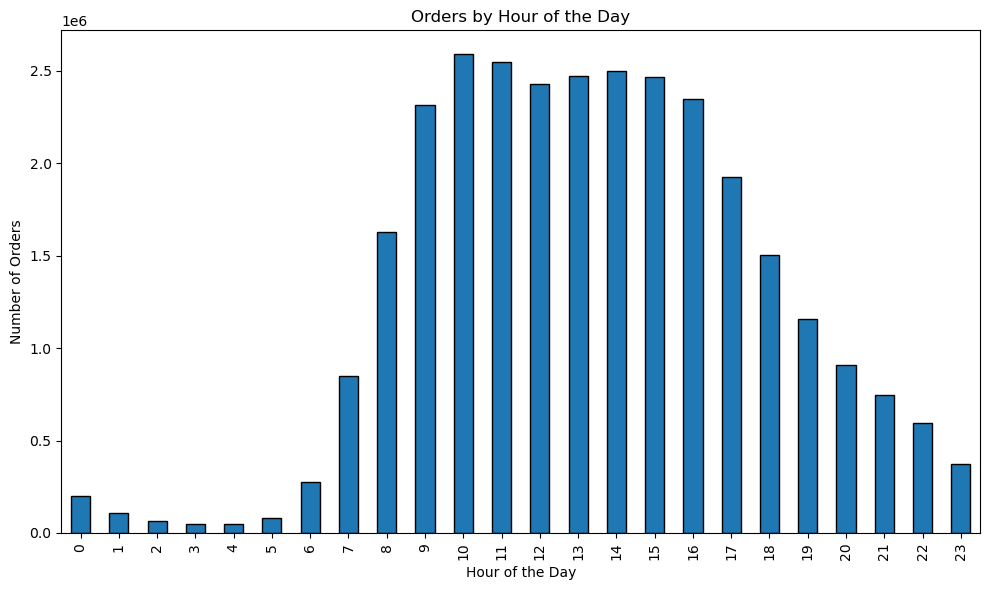

In [9]:
#Figure size
plt.figure(figsize=(10,6))

# Creating the bar chart from value counts
bhd = df['order_hour_of_day'].value_counts().sort_index().plot.bar(
      edgecolor='black'
)

# Adding labels and title
bhd.set_xlabel('Hour of the Day')
bhd.set_ylabel('Number of Orders')
bhd.set_title('Orders by Hour of the Day')

# Adjusting layout
plt.tight_layout()
plt.show()

SALES QUERY 2: Most profitable time of the day (mpt)

In [11]:
#Most Profitable Time of the Day (mpt)

Text(0, 0.5, 'Sales')

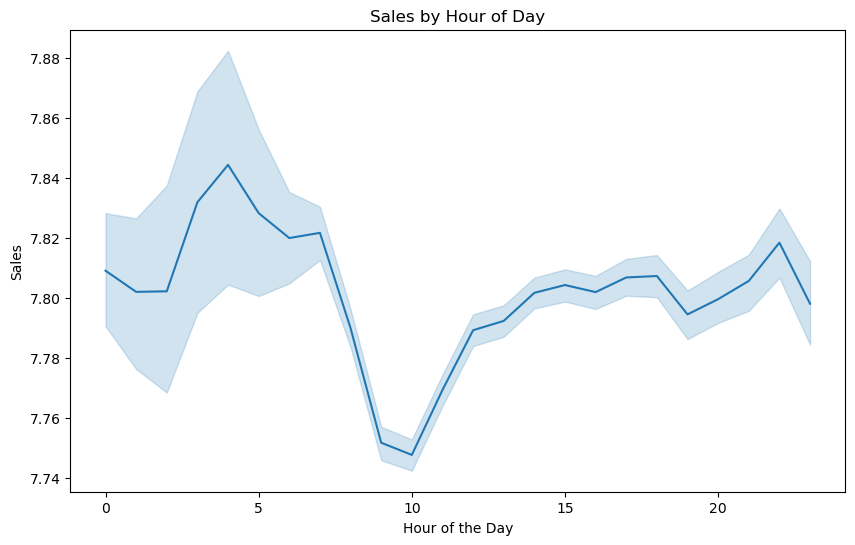

In [12]:
# Figure size
plt.figure(figsize=(10, 6))

# Creating line plot
mpt = sns.lineplot(data=df, x='order_hour_of_day', y='prices')

# Adding labels and title
mpt.set_title('Sales by Hour of Day')
mpt.set_xlabel('Hour of the Day')
mpt.set_ylabel('Sales')

SALES QUERY 3: Create tier labels for products (price_histogram, ptf, spt)

In [14]:
#Price_histogram

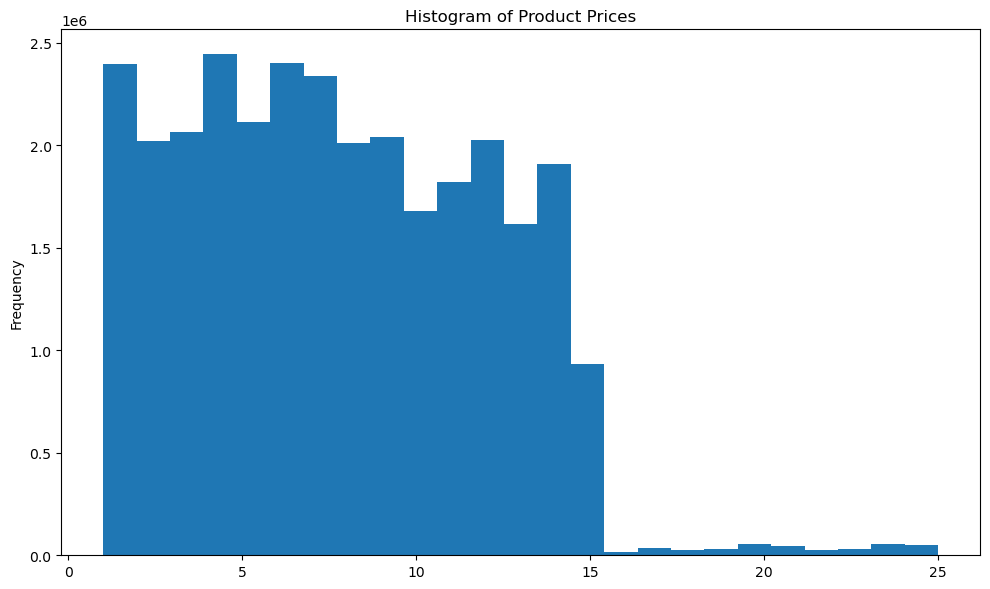

In [15]:
#Figure size
plt.figure(figsize=(10,6))

# Creating the bar chart from value counts
price_histogram = df['prices'].plot.hist(bins=25)

# Adding labels and title
price_histogram.set_ylabel('Frequency')
price_histogram.set_title('Histogram of Product Prices')

# Adjusting layout
plt.tight_layout()
plt.show()

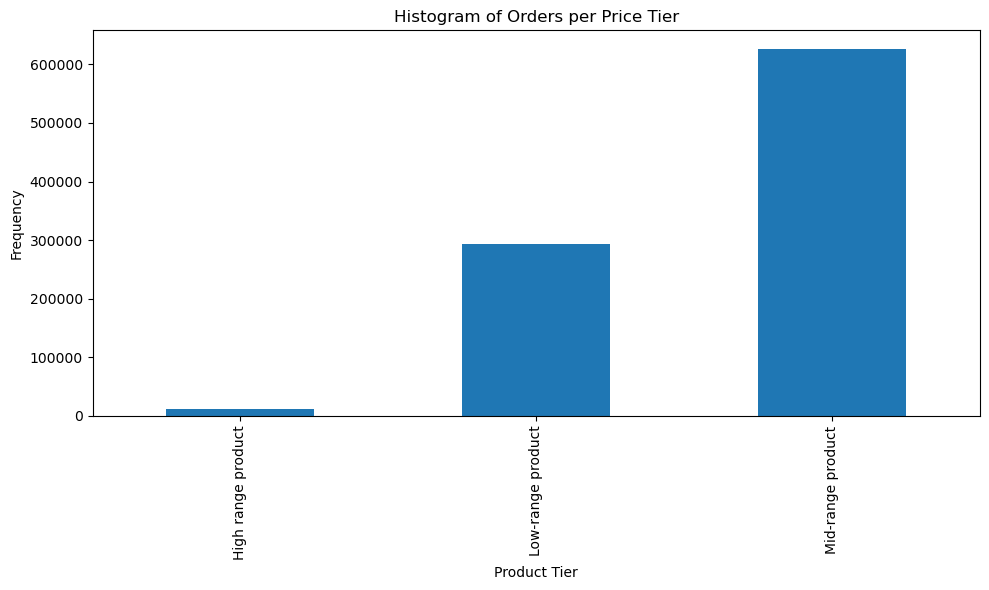

In [16]:
#Product Tier Frequency (ptf)
#Figure size
plt.figure(figsize=(10,6))

# Creating the bar chart from value counts
ptf =  df['price_range'].value_counts().sort_index().plot.bar()

# Adding labels and title
ptf.set_xlabel('Product Tier')
ptf.set_ylabel('Frequency')
ptf.set_title('Histogram of Orders per Price Tier')

# Adjusting layout
plt.tight_layout()
plt.show()

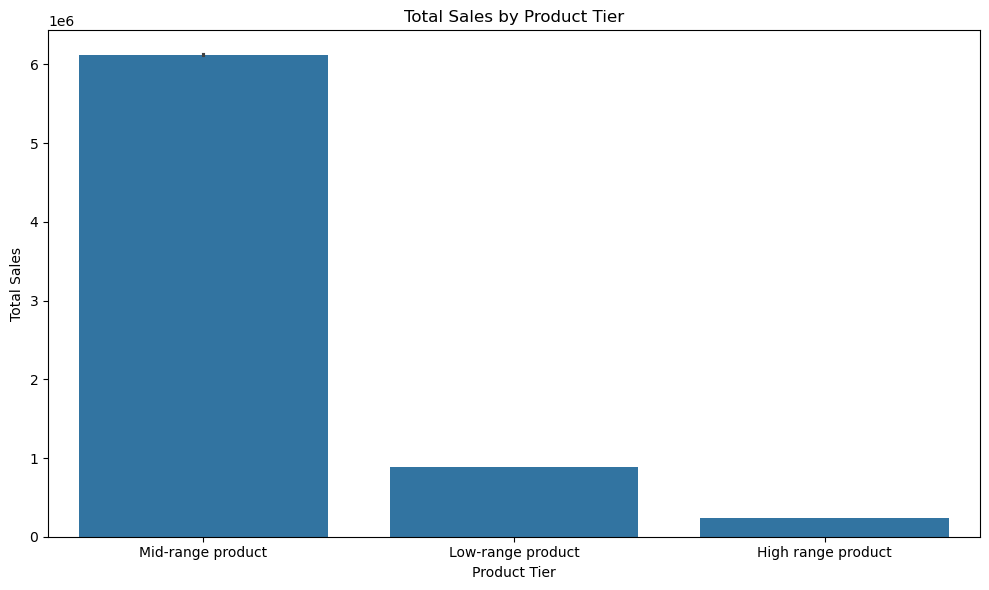

In [17]:
#Sales by Product Tier (spt)
plt.figure(figsize=(10,6))

# Creating the bar chart from value counts
spt = sns.barplot(data=df, x='price_range', y='prices', estimator=sum)

# Adding labels and title
plt.title('Total Sales by Product Tier')
plt.xlabel('Product Tier')
plt.ylabel('Total Sales')

# Adjusting layout
plt.tight_layout()
plt.show()

4. Marketing queries visualizations

MARKETING QUERY 1: How often do customers return to Instacart? 

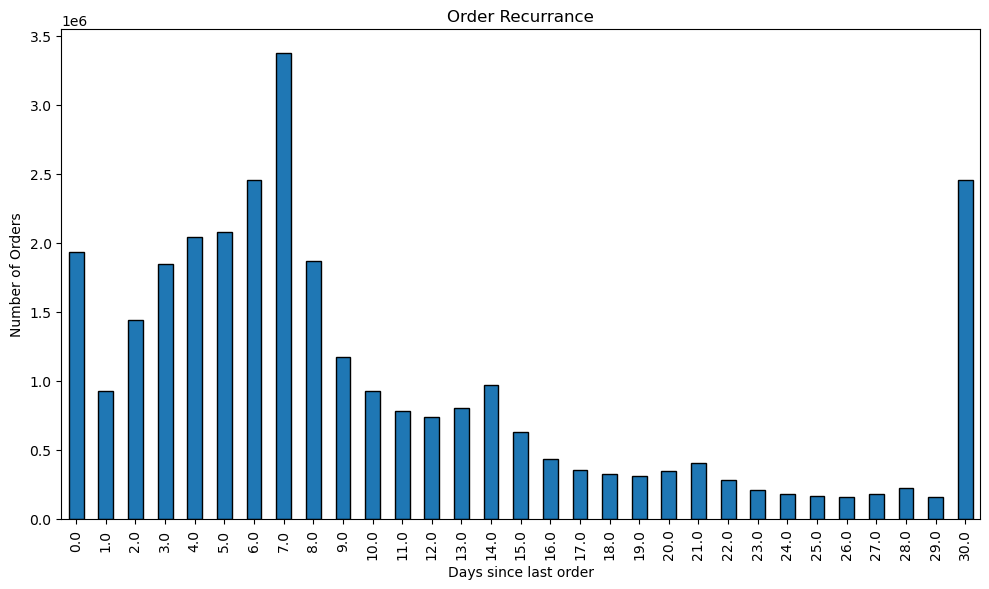

In [20]:
#Days Since Prior Order (dpo)
#Figure size
plt.figure(figsize=(10,6))

# Creating the bar chart from value counts
dpo = df['days_since_prior_order_clean'].value_counts().sort_index().plot.bar(
      edgecolor='black'
)

# Adding labels and title
dpo.set_xlabel('Days since last order')
dpo.set_ylabel('Number of Orders')
dpo.set_title('Order Recurrance')

# Adjusting layout
plt.tight_layout()
plt.show()

<Figure size 1800x1000 with 0 Axes>

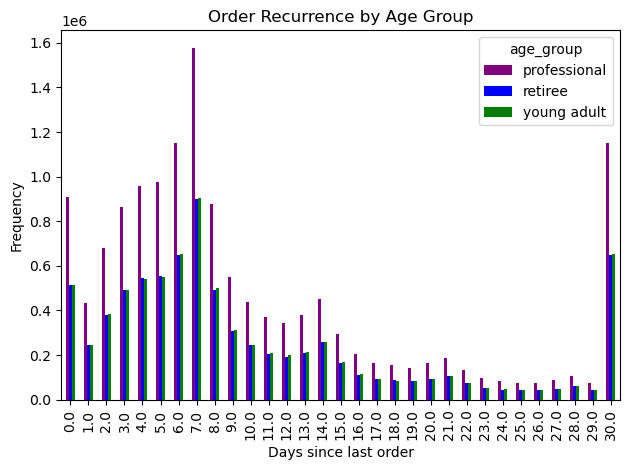

In [21]:
#Order Recurrence by Age Group (ora)
#Grouping
ora_grouping = df.groupby('days_since_prior_order_clean')['age_group'].value_counts().unstack(fill_value=0)

#Figure size
plt.figure(figsize=(18,10))

# Creating the bar chart 
ora = ora_grouping.plot.bar(color = [
    "purple", "blue", "green"
])

# Adding labels and title
plt.title('Order Recurrence by Age Group')
plt.xlabel('Days since last order')
plt.ylabel('Frequency')

# Adjusting layout
plt.tight_layout()
plt.show()

MARKETING QUERY 2: Are there differences in ordering habits based on a customer's loyalty status? What, how much money, at what time, how often : loyalty x product type, loyalty x price, loyalty x day of week, loyalty x days since

<Figure size 1800x1000 with 0 Axes>

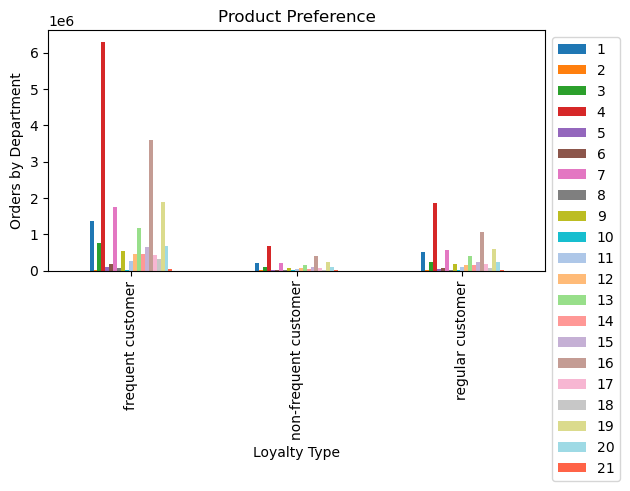

In [23]:
#Product Type Preference (ptp)
#Grouping
ptp_grouping = df.groupby('user_frequency')['department_id'].value_counts().unstack(fill_value=0)

#Figure size
plt.figure(figsize=(18,10))

# Creating the bar chart 
ptp = ptp_grouping.plot.bar(color = [
   "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
    "#ff6347"
])

#Moving the legend to the upper left outside the chart
ptp.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

# Adding labels and title
plt.title('Product Preference')
plt.xlabel('Loyalty Type')
plt.ylabel('Orders by Department')

# Adjusting layout
plt.tight_layout()
plt.show()

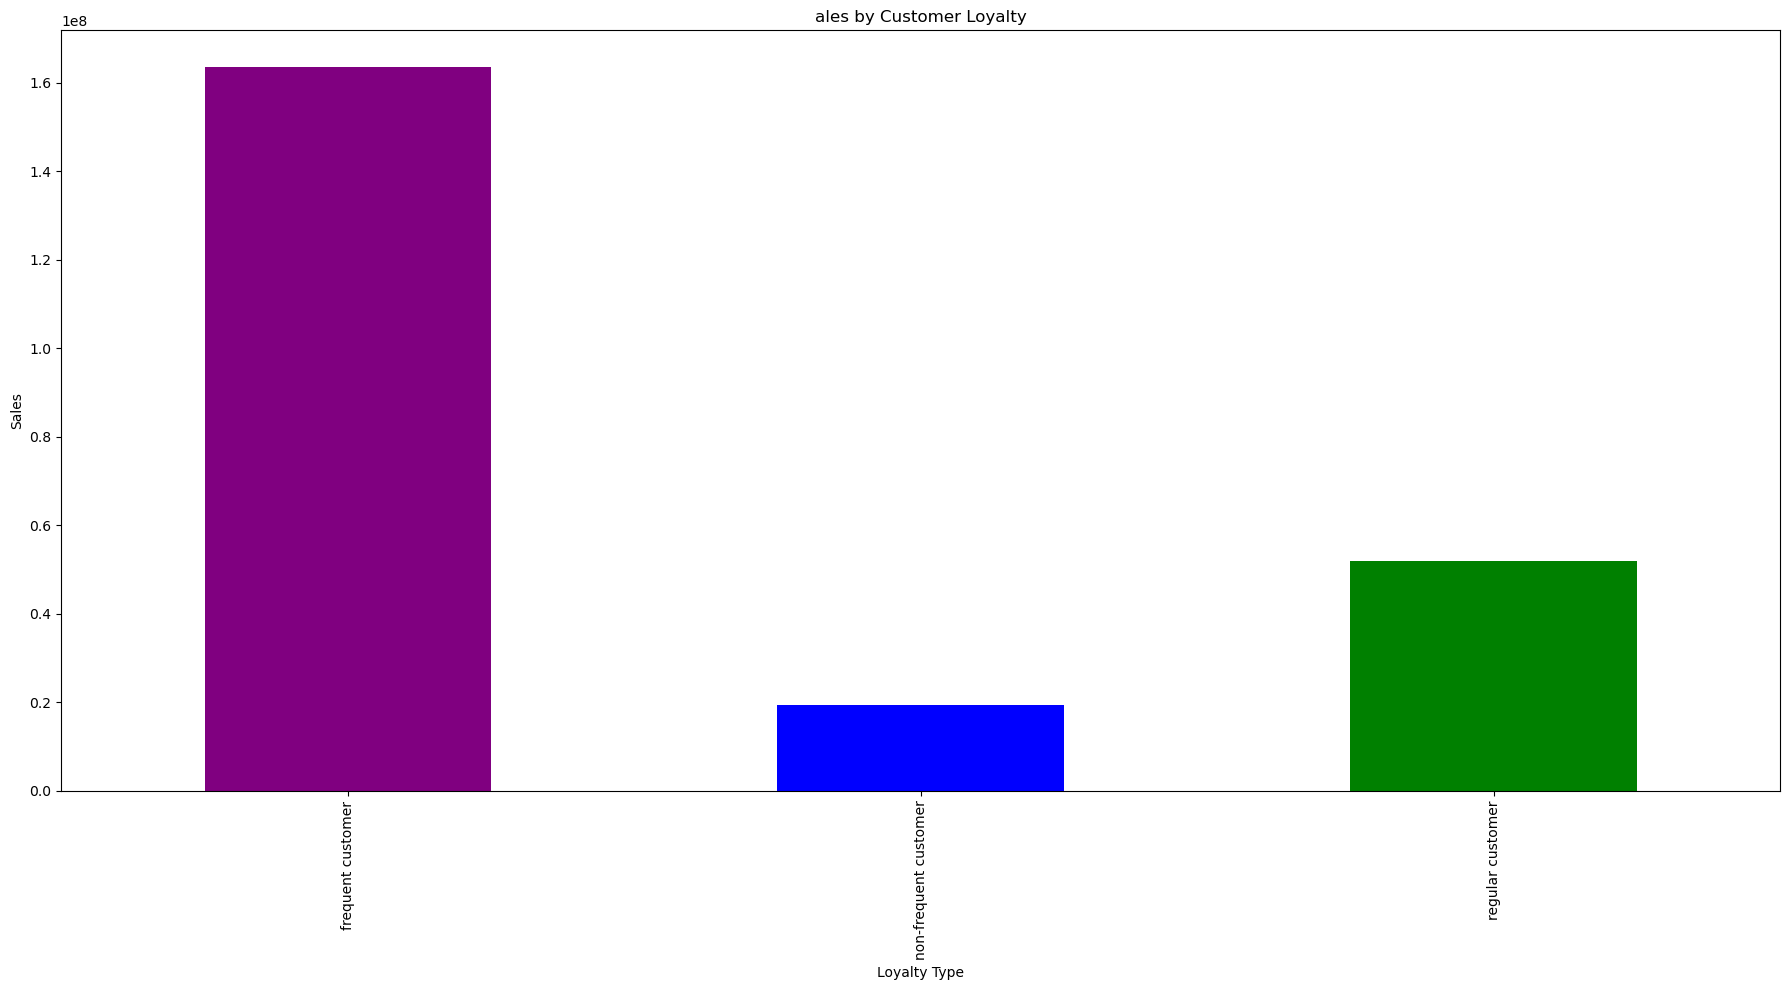

In [90]:
#Sales by Customer Loyalty (scl)
#Grouping
scl_grouping = df.groupby('user_frequency')['prices'].sum()
  
#Figure size
plt.figure(figsize=(18,10))

# Creating the bar chart 
scl = scl_grouping.plot.bar(color = [
   "purple", "blue", "green"
])

#Moving the legend to the upper left outside the chart
ptp.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

# Adding labels and title
plt.title ('ales by Customer Loyalty')
plt.xlabel('Loyalty Type')
plt.ylabel('Sales')

# Adjusting layout
plt.tight_layout()
plt.show()



<Figure size 1800x1000 with 0 Axes>

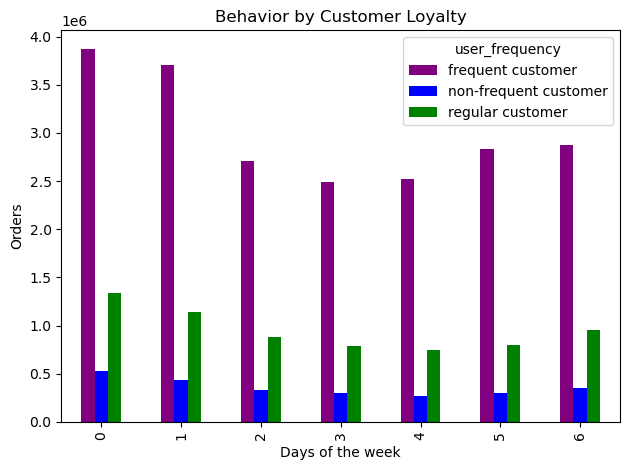

In [66]:
#Order Behavior by Customer Loyalty (obc)
#Grouping
obc_grouping = df.groupby('order_day_of_week')['user_frequency'].value_counts().unstack(fill_value=0)
  
#Figure size
plt.figure(figsize=(18,10))

# Creating the bar chart 
obc = obc_grouping.plot.bar(color = [
   "purple", "blue", "green"
])

#Moving the legend to the upper left outside the chart
ptp.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

# Adding labels and title
plt.title ('Behavior by Customer Loyalty')
plt.xlabel('Days of the week')
plt.ylabel('Orders')

# Adjusting layout
plt.tight_layout()
plt.show()



MARKETING QUERY 3: Are there differences in ordering habits based on a customer's region?

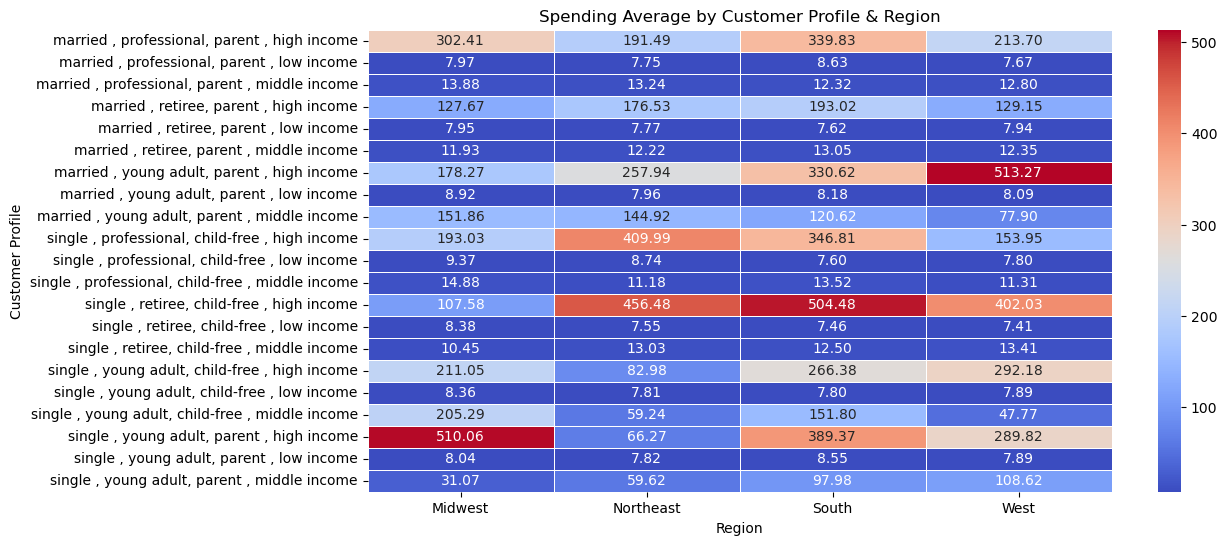

In [132]:
#Regional Customer Profile Spending Average (rcpsa)
#Aggregate data
grouped_df = df.groupby(['customer_profile', 'geo_region']).agg({
    'spending_avg': 'mean'
}).reset_index()

#Pivot for heatmap
heatmap_spendavg_region = grouped_df.pivot(index='customer_profile', columns='geo_region', values='spending_avg')

#Plot heatmap
plt.figure(figsize=(12, 6))

rcpsa=sns.heatmap(heatmap_spendavg_region, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

plt.title('Spending Average by Customer Profile & Region')
plt.xlabel('Region')
plt.ylabel('Customer Profile')
plt.savefig(r'C:\Users\Alejandra\Documents\CF\Data Immersion\Achievement 4\06022025_Instacart Basket Analysis\04_Analysis\Visualizations\4.10\spending_avg_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

MARKETING QUERY 4: Is there a connection between age and family status in terms of ordering habits? 

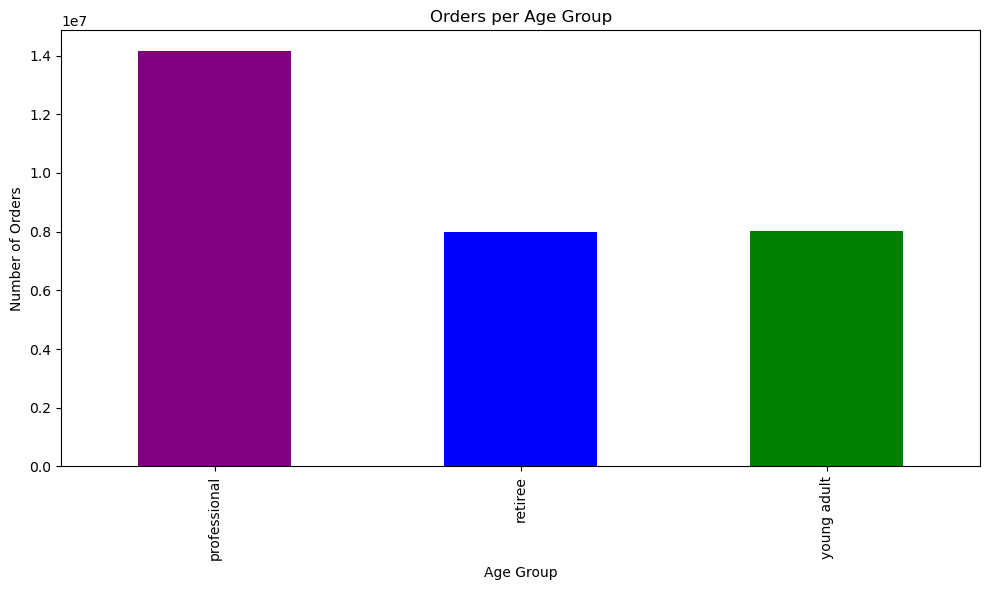

In [74]:
#Orders per Age Group (oag)
#Figure size
plt.figure(figsize=(10,6))

# Creating the bar chart from value counts
oag = df['age_group'].value_counts().sort_index().plot.bar(color = [
   "purple", "blue", "green"
])

# Adding labels and title
oag.set_xlabel('Age Group')
oag.set_ylabel('Number of Orders')
oag.set_title('Orders per Age Group')

# Adjusting layout
plt.tight_layout()
plt.show()

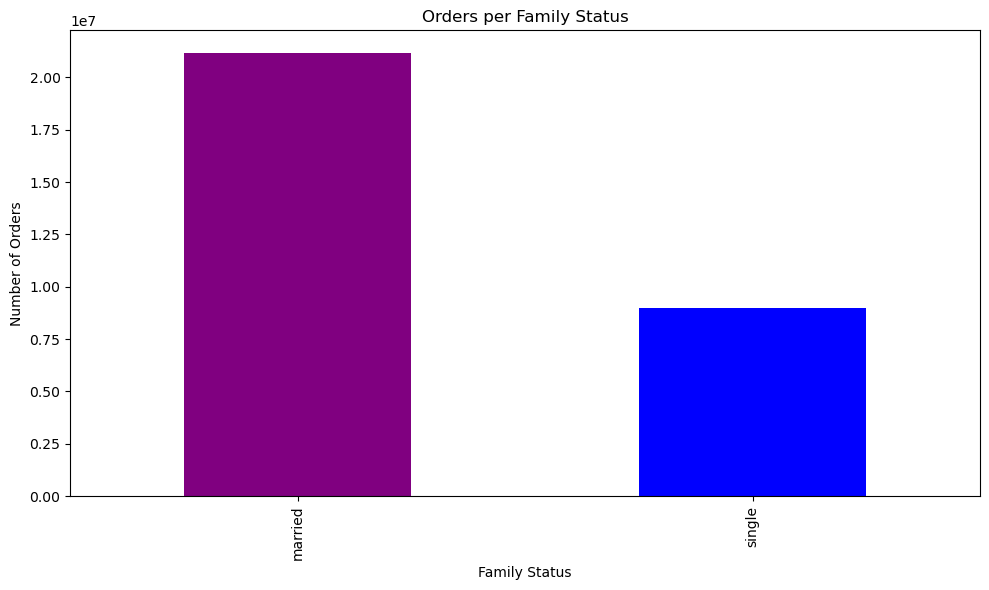

In [75]:
#Orders per Family Status (oag)
#Figure size
plt.figure(figsize=(10,6))

# Creating the bar chart from value counts
ofs = df['marital_status'].value_counts().sort_index().plot.bar(color = [
   "purple", "blue", "green"
])

# Adding labels and title
ofs.set_xlabel('Family Status')
ofs.set_ylabel('Number of Orders')
ofs.set_title('Orders per Family Status')

# Adjusting layout
plt.tight_layout()
plt.show()

<Figure size 1800x1000 with 0 Axes>

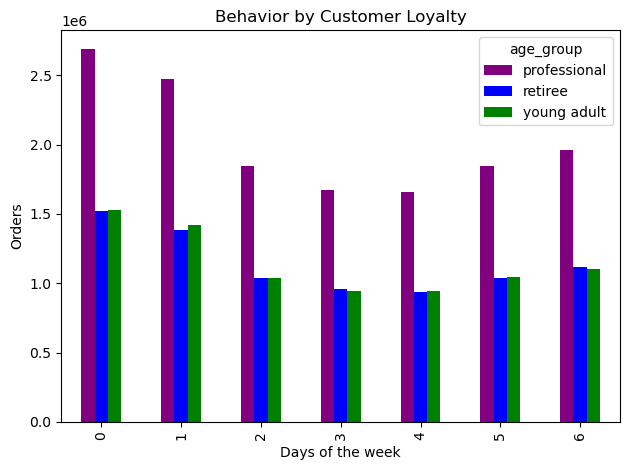

In [76]:
#Order Behavior by Age Group (obag)
#Grouping
obag_grouping = df.groupby('order_day_of_week')['age_group'].value_counts().unstack(fill_value=0)
  
#Figure size
plt.figure(figsize=(18,10))

# Creating the bar chart 
obag = obag_grouping.plot.bar(color = [
   "purple", "blue", "green"
])

#Moving the legend to the upper left outside the chart
ptp.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

# Adding labels and title
plt.title ('Behavior by Customer Loyalty')
plt.xlabel('Days of the week')
plt.ylabel('Orders')

# Adjusting layout
plt.tight_layout()
plt.show()


<Figure size 1800x1000 with 0 Axes>

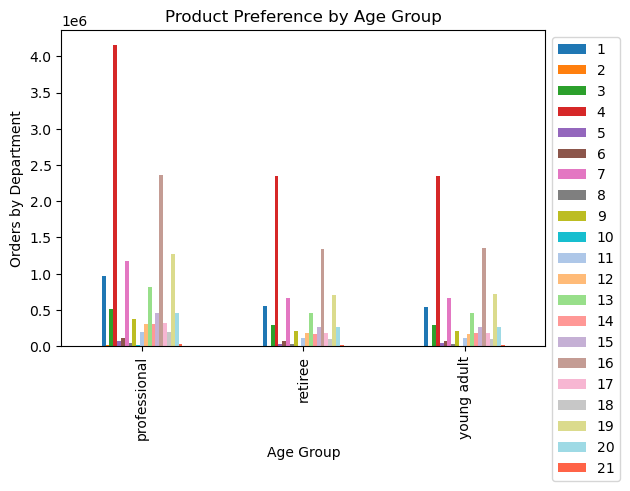

In [77]:
#Product Type Preference by Age Group (ptpa)
#Grouping
ptpa_grouping = df.groupby('age_group')['department_id'].value_counts().unstack(fill_value=0)

#Figure size
plt.figure(figsize=(18,10))

# Creating the bar chart 
ptpa = ptpa_grouping.plot.bar(color = [
   "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
    "#ff6347"
])

#Moving the legend to the upper left outside the chart
ptpa.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

# Adding labels and title
plt.title('Product Preference by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Orders by Department')

# Adjusting layout
plt.tight_layout()
plt.show()

MARKETING QUERY 5: What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

<Figure size 1800x1000 with 0 Axes>

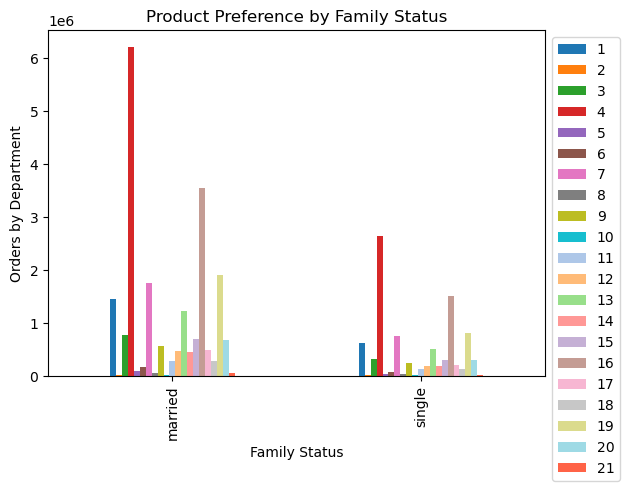

In [79]:
#Product Type Preference by Family Status (ptpf)
#Grouping
ptpf_grouping = df.groupby('marital_status')['department_id'].value_counts().unstack(fill_value=0)

#Figure size
plt.figure(figsize=(18,10))

# Creating the bar chart 
ptpf = ptpf_grouping.plot.bar(color = [
   "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
    "#ff6347"
])

#Moving the legend to the upper left outside the chart
ptpf.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

# Adding labels and title
plt.title('Product Preference by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Orders by Department')

# Adjusting layout
plt.tight_layout()
plt.show()

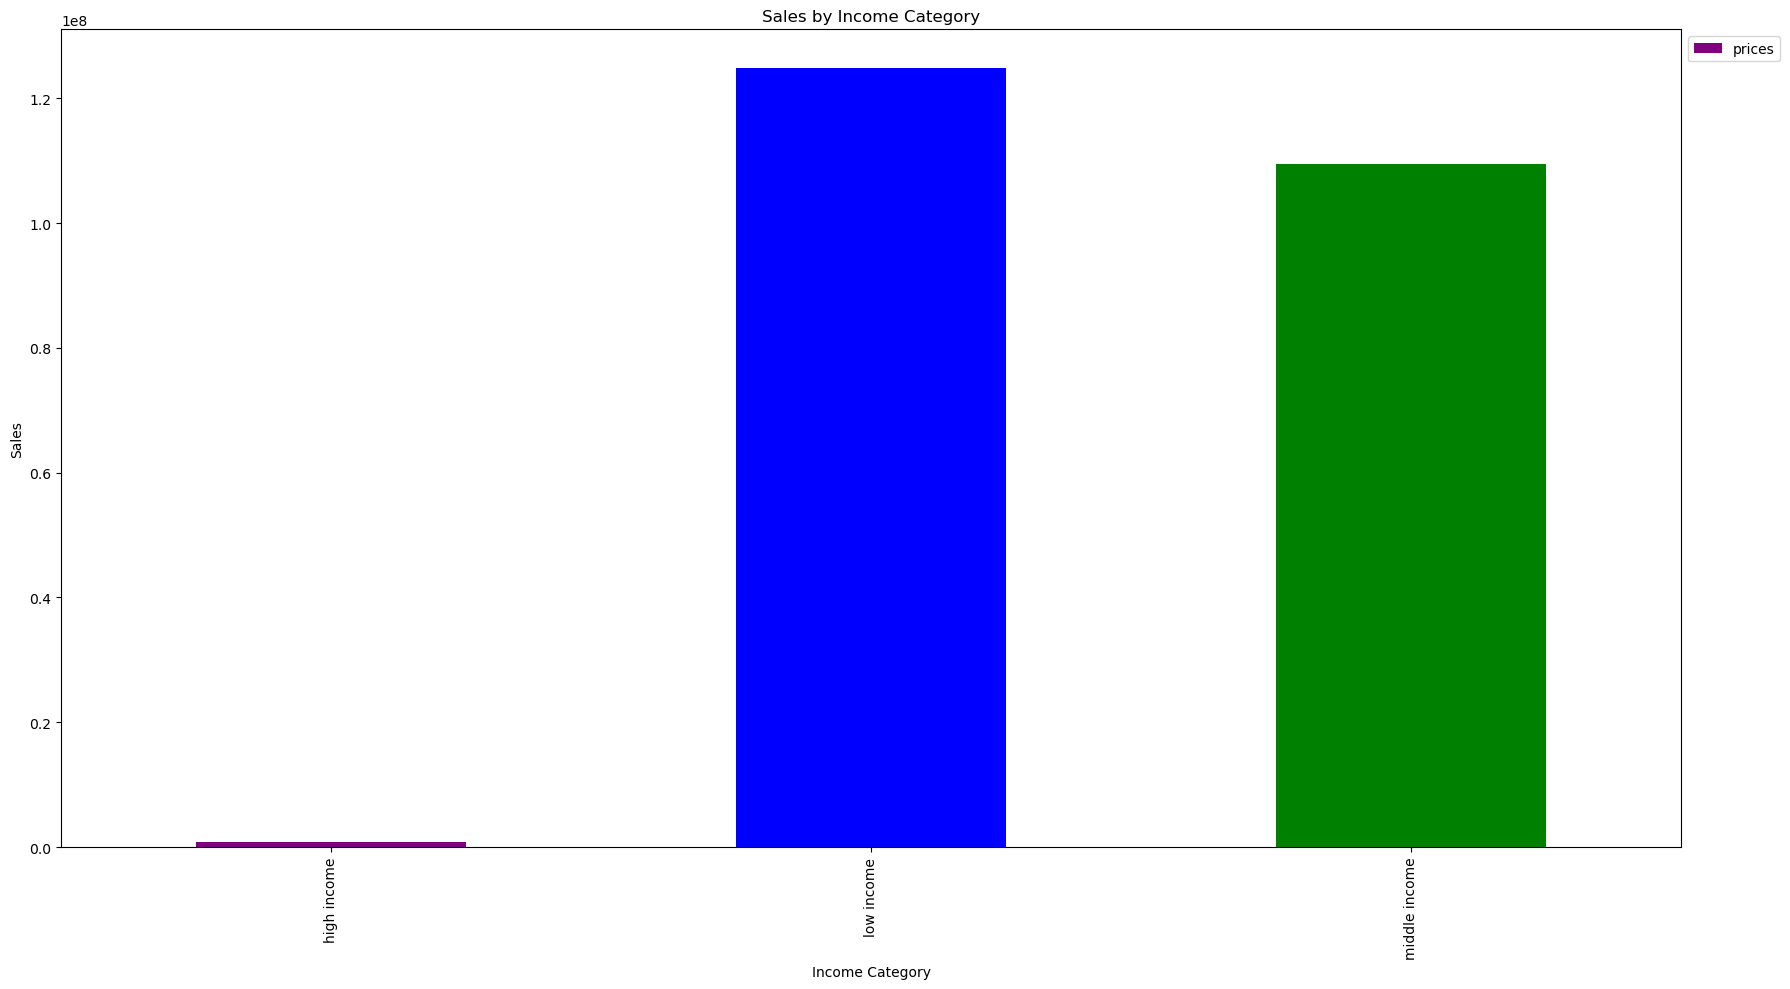

In [80]:
#Sales by Income Category (sic)
#Grouping
sic_grouping = df.groupby('income_category')['prices'].sum()

#Figure size
plt.figure(figsize=(18,10))

# Creating the bar chart 
sic = sic_grouping.plot.bar(color = [
   "purple", "blue", "green"
])

#Moving the legend to the upper left outside the chart
sic.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

# Adding labels and title
plt.title('Sales by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Sales')

# Adjusting layout
plt.tight_layout()
plt.show()

5. Exporting Files

SALES

In [92]:
#Busiest Days of the Week
bdw.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Busiest Days of Week.png'))

In [94]:
#Busiest Hour of the Day
bhd.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Busiest Hours of Day.png'))

In [96]:
#Most Profitable Time of the Day
mpt.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Most Profitable Time.png'))

In [98]:
#Price Histogram
price_histogram.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Prices Histogram.png'))

In [100]:
#Product Tier Frequency
ptf.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Product Tier Frequency.png'))

In [102]:
#Sales by Product Tier
spt.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Sales by Product Tier.png'))

MARKETING

In [104]:
#Days Since Prior Order
dpo.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Days Since Last Order.png'))

In [106]:
#Order Recurrence by Age Group
ora.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Order Recurrence by Age Group.png'))

In [108]:
#Product Type Preference
ptp.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Product Type Preference.png'))

In [110]:
#Sales by Customer Loyalty
scl.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Sales by Customer Loyalty.png'))

In [112]:
#Order Behavior by Costumer Loyalty
obc.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Order Behavior by Costumer Loyalty.png'))

In [134]:
#Regional Customer Profile Spending Average
rcpsa.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Regional Customer Profile Spending Average.png'))

In [117]:
#Orders per Age Group
oag.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Orders per Age Group.png'))

In [119]:
#Orders per Family Status
ofs.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Orders per Family Status.png'))

In [121]:
#Order Behavior by Age Group
obag.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Order Behavior by Age Group.png'))

In [123]:
#Product Type Preference by Age Group
ptpa.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Product Type Preference by Age Group.png'))

In [125]:
#Product Type Preference by Family Status
ptpf.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Product Preference by Family Status.png'))

In [127]:
#Sales by Income Category
sic.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'Final', 'Sales by Income Category.png'))

In [136]:
#Export data to pkl
df.to_pickle(os.path.join(path, '02_Data','Prepared Data', 'ord_prod_cust_finaversion.pkl'))